# Marketing Campaign Data Analytics

In [42]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics


In [43]:

# Load Traditional and Online Campaign Datasets
traditional_df = pd.read_csv('traditional_campaign.csv')  # Use appropriate path
online_df = pd.read_csv('facebook_campaign.csv')

# Display first few rows
print(traditional_df.head())
print(online_df.head())


   MarketID MarketSize  LocationID  AgeOfStore  Promotion  Week  \
0         1      Small         101           5          1     1   
1         2     Medium         102          10          2     1   
2         3      Large         103          15          3     2   
3         4      Small         104           8          1     2   
4         5      Large         105          12          2     3   

   SalesInThousands  
0              10.5  
1              15.2  
2              20.1  
3              14.8  
4              19.3  
   impressions  clicks   CPC  CPM  reach  conversions   ctr
0        10000     200  0.50   10   8000           10  0.02
1        15000     300  0.60   12  12000           15  0.02
2        20000     400  0.70   14  15000           20  0.02
3        12000     250  0.55   11   9000           12  0.02
4        18000     350  0.65   13  14000           18  0.02


In [44]:

# Handling missing values in traditional data (if any)
traditional_df.isna().sum()

# Cleaning online campaign data
online_df.isna().sum()

# Fill missing values as described in the paper
online_df.fillna(0, inplace=True)  # You can modify this based on specific columns


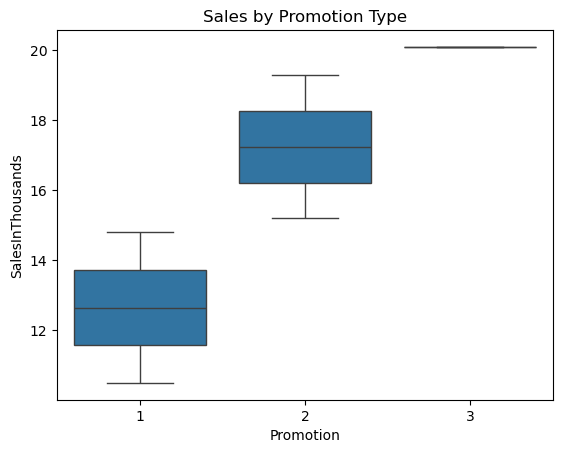

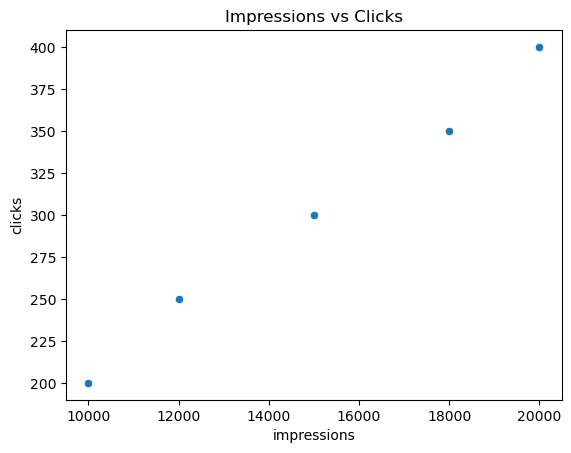

In [45]:

# Plot sales by promotion type
sns.boxplot(x='Promotion', y='SalesInThousands', data=traditional_df)
plt.title('Sales by Promotion Type')
plt.show()

# Plot for Facebook dataset - Impressions vs Clicks
sns.scatterplot(x='impressions', y='clicks', data=online_df)
plt.title('Impressions vs Clicks')
plt.show()


In [46]:
# Apply one-hot encoding to 'MarketSize' and concatenate the new columns
from sklearn.preprocessing import OneHotEncoder

# Apply one-hot encoding to 'MarketSize'
encoder = OneHotEncoder(sparse_output=False)
market_size_encoded = encoder.fit_transform(traditional_df[['MarketSize']])

# Convert encoded values into a DataFrame and concatenate with the original dataset
market_size_df = pd.DataFrame(market_size_encoded, columns=encoder.get_feature_names_out(['MarketSize']))
traditional_df_encoded = pd.concat([traditional_df, market_size_df], axis=1)

# Drop the original 'MarketSize' column
traditional_df_encoded.drop('MarketSize', axis=1, inplace=True)

# Now use the encoded dataset for training
X_traditional = traditional_df_encoded[['AgeOfStore', 'Promotion', 'Week'] + list(market_size_df.columns)]
y_traditional = traditional_df_encoded['SalesInThousands']

# Split the data into training and testing sets
X_train_trad, X_test_trad, y_train_trad, y_test_trad = train_test_split(X_traditional, y_traditional, test_size=0.3, random_state=42)

# Train the Random Forest model
rf_model_trad = RandomForestRegressor()
rf_model_trad.fit(X_train_trad, y_train_trad)

# Now you can proceed with predictions and evaluation


RandomForestRegressor()

In [47]:
# Predictions for traditional data
y_pred_trad = rf_model_trad.predict(X_test_trad)

# Train Random Forest for Online Data (if not already done)
rf_model_online = RandomForestRegressor()
rf_model_online.fit(X_train_online, y_train_online)

# Predictions for online data
y_pred_online = rf_model_online.predict(X_test_online)

# Calculate RMSE for both models
rmse_trad = np.sqrt(metrics.mean_squared_error(y_test_trad, y_pred_trad))
rmse_online = np.sqrt(metrics.mean_squared_error(y_test_online, y_pred_online))

print(f'RMSE for Traditional Campaign: {rmse_trad}')
print(f'RMSE for Online Campaign: {rmse_online}')


RMSE for Traditional Campaign: 1.4731642814024715
RMSE for Online Campaign: 1.3877787807814457e-17


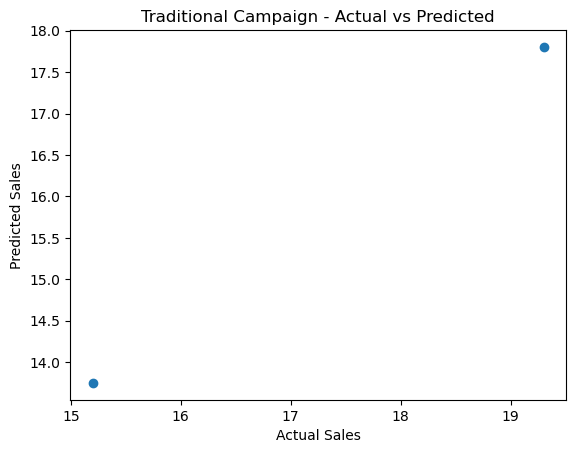

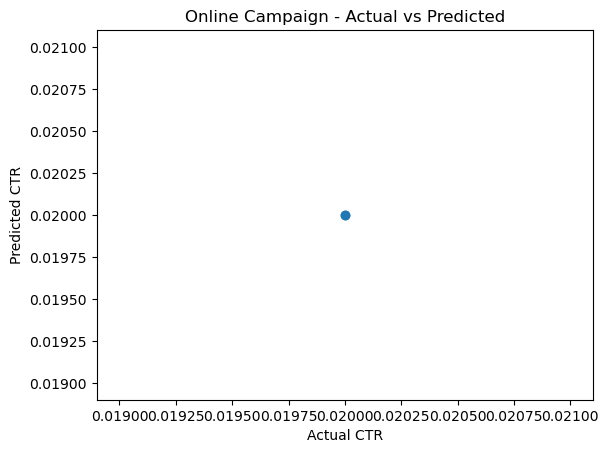

In [48]:

# Actual vs Predicted for Traditional Campaign
plt.scatter(y_test_trad, y_pred_trad)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Traditional Campaign - Actual vs Predicted')
plt.show()

# Actual vs Predicted for Online Campaign
plt.scatter(y_test_online, y_pred_online)
plt.xlabel('Actual CTR')
plt.ylabel('Predicted CTR')
plt.title('Online Campaign - Actual vs Predicted')
plt.show()
